In [1]:
import os
import time
import requests
from collections import OrderedDict
from bs4 import BeautifulSoup
from re import sub
import numpy as np
import pandas as pd
from matplotlib.colors import rgb2hex
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import time
import json

In [2]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from keras.optimizers import Adam

2022-01-20 22:25:54.026788: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-20 22:25:54.026806: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


ImportError: cannot import name 'Adam' from 'keras.optimizers' (/home/jmsdnns/Data/envs/cpunks/lib64/python3.10/site-packages/keras/optimizers.py)

In [3]:
%%bash 
pwd

/home/jmsdnns/Data/cpunks-10k/nb


In [4]:
IMAGE_DIR='../../../colorpunx/cryptopunks/images/training'
PUNK_TYPES=['alien','ape','zombie','female','male']
PUNK_ATTRS= {
    'alien': 0,
    'ape': 0,
    'zombie': 0,
    'female': 0,
    'male': 0,
    'beanie': 0,
    'choker': 0,
    'pilotHelmet': 0,
    'tiara': 0,
    'orangeSide': 0,
    'buckTeeth': 0,
    'weldingGoggles': 0,
    'pigtails': 0,
    'pinkWithHat': 0,
    'topHat': 0,
    'spots': 0,
    'rosyCheeks': 0,
    'blondeShort': 0,
    'wildWhiteHair': 0,
    'cowboyHat': 0,
    'wildBlonde': 0,
    'straightHairBlonde': 0,
    'bigBeard': 0,
    'redMohawk': 0,
    'halfShaved': 0,
    'blondeBob': 0,
    'vampireHair': 0,
    'clownHairGreen': 0,
    'straightHairDark': 0,
    'straightHair': 0,
    'silverChain': 0,
    'darkHair': 0,
    'purpleHair': 0,
    'goldChain': 0,
    'medicalMask': 0,
    'tassleHat': 0,
    'fedora': 0,
    'policeCap': 0,
    'clownNose': 0,
    'smile': 0,
    'capForward': 0,
    'hoodie': 0,
    'frontBeardDark': 0,
    'frown': 0,
    'purpleEyeShadow': 0,
    'handlebars': 0,
    'blueEyeShadow': 0,
    'greenEyeShadow': 0,
    'vape': 0,
    'frontBeard': 0,
    'chinstrap': 0,
    '3DGlasses': 0,
    'luxuriousBeard': 0,
    'mustache': 0,
    'normalBeardBlack': 0,
    'normalBeard': 0,
    'eyeMask': 0,
    'goat': 0,
    'doRag': 0,
    'shavedHead': 0,
    'muttonchops': 0,
    'peakSpike': 0,
    'pipe': 0,
    'vr': 0,
    'cap': 0,
    'smallShades': 0,
    'clownEyesGreen': 0,
    'clownEyesBlue': 0,
    'headband': 0,
    'crazyHair': 0,
    'knittedCap': 0,
    'mohawkDark': 0,
    'mohawk': 0,
    'mohawkThin': 0,
    'frumpyHair': 0,
    'wildHair': 0,
    'messyHair': 0,
    'eyePatch': 0,
    'stringyHair': 0,
    'bandana': 0,
    'classicShades': 0,
    'shadowBeard': 0,
    'regularShades': 0,
    'hornedRimGlasses': 0,
    'bigShades': 0,
    'nerdGlasses': 0,
    'blackLipstick': 0,
    'mole': 0,
    'purpleLipstick': 0,
    'hotLipstick': 0,
    'cigarette': 0,
    'earring': 0}


In [7]:
def camel_case(string):
  '''
     Convert string to camelCase
  '''
  string = string.strip("\n")
  string = sub(r"(_|-)+", " ", string).title().replace(" ", "")
  return string[0].lower() + string[1:]


In [8]:
def get_punk_attrs(id):
    '''
       Retrieve `id` cryptopunk from larvalabs.com,
       parse HTML to extract type and attribute list
       to return list of attributes
    '''
    typeClass="col-md-10 col-md-offset-1 col-xs-12"
    punk_page=requests.get(f"https://www.larvalabs.com/cryptopunks/details/{id}")
    if(punk_page.status_code != 200):
        print(punk_page.status_code)
        return {}
    punk_html=punk_page.text

    soup = BeautifulSoup(punk_html, 'html.parser')
    details = soup.find(id="punkDetails")

    punkType = camel_case(details.find(class_=typeClass).find('a').contents[0])

    attrs=[punkType]
    attrTags = details.find(class_ = "row detail-row")
    for attrTag in attrTags.find_all('a'):
        attrs.append(camel_case(attrTag.contents[0]))
    return attrs[0:1] + attrs[2:]

In [9]:
def get_punk_dict(id):
   '''
      Retrieve a punk page, pull type and attributes
      from HTML and return a dictionary of attribute to
      (-1,1) mapping where 1 is truthy for existence of 
      attribute
   '''
   od = {k:PUNK_ATTRS[k] for k in PUNK_ATTRS}
   attrs = get_punk_attrs(id)
   for attr in attrs:
      od[attr]=1
   return od


In [10]:
x = get_punk_dict(23)

In [11]:
punks={}
for id in range(0,10000):
    punks[id] = get_punk_dict(id)
    print(id)
#     time.sleep(3.5)
punks

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


KeyboardInterrupt: 

In [6]:
def get_punk(id):
    img = mpimg.imread(f'''{IMAGE_DIR}/punk{"%04d" % id}.png''')
    # drop the transparency channel
    #return np.array([[np.take(c,[0,1,2]) for c in row]
    #                 for row in img])
    return img

In [157]:
#import json
#with open('punks.json', 'w') as convert_file:
#     convert_file.write(json.dumps(punks))

In [11]:
with open('../data/punks.json') as f:
  punks_json = json.load(f)

### read the json file

In [21]:
df = pd.DataFrame.from_dict(punks_json, orient='index')
df['img'] = df.apply(lambda row: [get_punk(int(row.name))], axis=1)

In [23]:
df['img'].head()

0    [[[[0. 0. 0. 0.], [0. 0. 0. 0.], [0. 0. 0. 0.]...
1    [[[[0. 0. 0. 0.], [0. 0. 0. 0.], [0. 0. 0. 0.]...
2    [[[[0. 0. 0. 0.], [0. 0. 0. 0.], [0. 0. 0. 0.]...
3    [[[[0. 0. 0. 0.], [0. 0. 0. 0.], [0. 0. 0. 0.]...
4    [[[[0. 0. 0. 0.], [0. 0. 0. 0.], [0. 0. 0. 0.]...
Name: img, dtype: object

In [25]:
df.to_pickle('./punks.pkl')

In [24]:
%%bash 
pwd

/home/tnn1t1s/art/bodysnatchers/cpunks-10k/nb


### make sure this works with simple classifier

In [220]:
def load_data(labels):
    df = 
    X = df['img'].to_numpy()
    Y = df[labels].to_numpy()
    X  = np.array([row[0] for row in X])
    X_train = X[0:9000]
    Y_train = Y[0:9000]
    X_test = X[9000:10000]
    Y_test = Y[9000:10000]
    return (X_train, Y_train), (X_test, Y_test)

In [221]:
labels = ['male', 'female']
(X_train, Y_train),(X_test, Y_test) = load_data(labels)

In [222]:
input_layer = Input(shape = (24, 24,3))
x = Flatten()(input_layer)

x = Dense(units = 200, activation = 'relu')(x)
x = Dense(units = 150, activation = 'relu')(x)

output_layer = Dense(units=2, activation = 'softmax')(x)

model = Model(input_layer, output_layer)


In [186]:
opt = Adam(lr=0.0005)

In [223]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics = ['accuracy'])

In [224]:
model.fit(X_train,
          Y_train,
          batch_size = 32,
          epochs = 10,
          shuffle = True)

Epoch 1/10
282/282 [==============================] - 2s 5ms/step - loss: 0.1645 - accuracy: 0.9726
Epoch 2/10
282/282 [==============================] - 1s 5ms/step - loss: 0.1371 - accuracy: 0.9922
Epoch 3/10
282/282 [==============================] - 1s 5ms/step - loss: 1.4076 - accuracy: 0.9754
Epoch 4/10
282/282 [==============================] - 1s 5ms/step - loss: 0.0968 - accuracy: 0.9944
Epoch 5/10
282/282 [==============================] - 1s 5ms/step - loss: 4.6456 - accuracy: 0.9309
Epoch 6/10
282/282 [==============================] - 1s 5ms/step - loss: 0.5542 - accuracy: 0.9902
Epoch 7/10
282/282 [==============================] - 1s 5ms/step - loss: 5.9896 - accuracy: 0.9454
Epoch 8/10
282/282 [==============================] - 2s 6ms/step - loss: 0.2757 - accuracy: 0.9899
Epoch 9/10
282/282 [==============================] - 2s 5ms/step - loss: 21.2675 - accuracy: 0.9067
Epoch 10/10
282/282 [==============================] - 2s 7ms/step - loss: 14.4945 - accuracy: 0.91

In [225]:
model.evaluate(X_test, Y_test)

32/32 [==============================] - 0s 3ms/step - loss: 5.4389 - accuracy: 0.8960


[5.438907623291016, 0.8960000276565552]

In [228]:
labels=np.array(labels)

preds = model.predict(X_test)
preds_single = labels[np.argmax(preds, axis=-1)]
actual_single = labels[np.argmax(Y_test, axis=-1)]

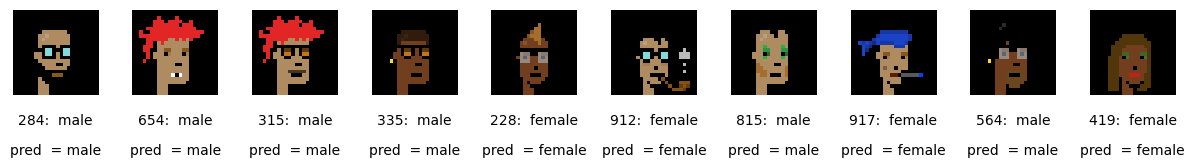

In [229]:
n=10
indices = np.random.choice(range(len(X_test)), n)
fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, idx in enumerate(indices):
    img = X_test[idx]
    ax = fig.add_subplot(1, n, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 
            f"{idx}:  {str(actual_single[idx])}", 
            fontsize=10, 
            ha='center',
            transform=ax.transAxes)
    ax.text(0.5, 
            -0.70, 
            'pred  = ' + str(preds_single[idx]), 
            fontsize=10,  
            ha='center',
           transform=ax.transAxes)
    ax.imshow(img)